In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving bike_sharing_data.txt to bike_sharing_data.txt


In [4]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


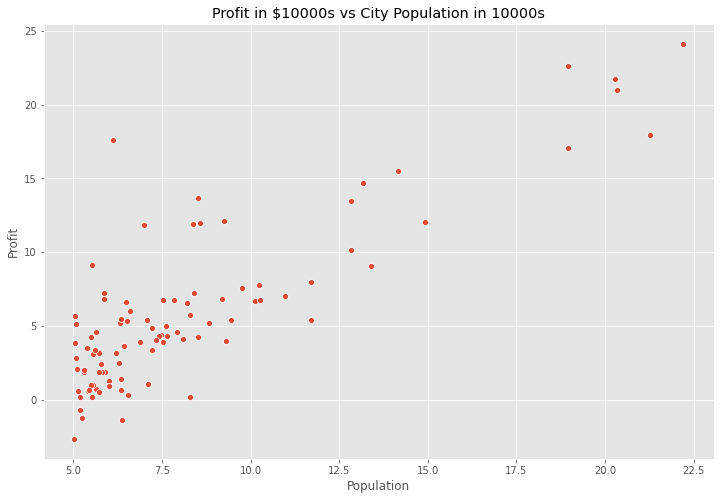

In [6]:
## Seaborn to create the scattered plot
ax = sns.scatterplot(x="Population", y="Profit", data=data)
ax.set_title("Profit in $10000s vs City Population in 10000s");

In [0]:
## Compute the cost function
def cost_function(x, y, theta):
  m = len(y)
  y_pred = x.dot(theta)
  error = (y_pred - y) ** 2
  return 1/(2*m) * np.sum(error)

In [8]:
## let's assign values
m = data.Population.values.size
x = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))
cost_function(x,y,theta)

32.072733877455676

In [0]:
def gradient_descent(x, y, theta, alpha, iterations):
  m = len(y)
  costs = []
  for i in range(iterations):
    y_pred = x.dot(theta)
    error = np.dot(x.transpose(), (y_pred - y))
    theta -= alpha * 1/m * error
    costs.append(cost_function(x, y, theta))
  return theta, costs

In [10]:
## test gradient_descent to run on our data
theta, costs = gradient_descent(x, y, theta, alpha=0.01, iterations=2000)
print("h(x) = {} + {}x1", format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = {} + {}x1 -3.79


In [0]:
## Visualize the cost function
from mpl_toolkits.mplot3d import Axes3D

In [0]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)
cost_values = np.zeros((len(theta_0), len(theta_1)))
for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])
    cost_values[i, j] = cost_function(x, y, t)

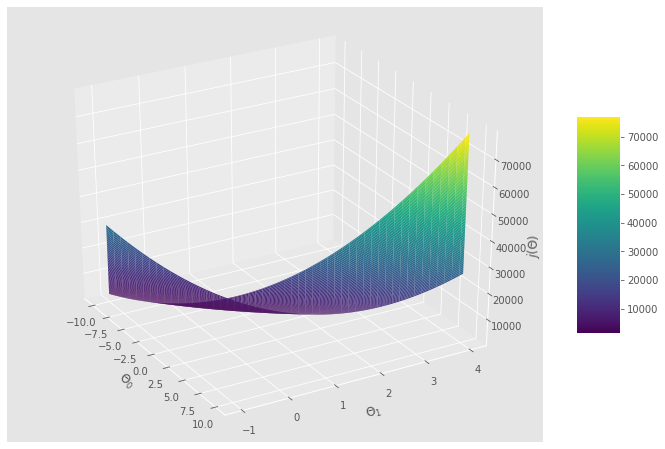

In [13]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$j(\Theta)$")
ax.view_init(30, 330)
plt.show()

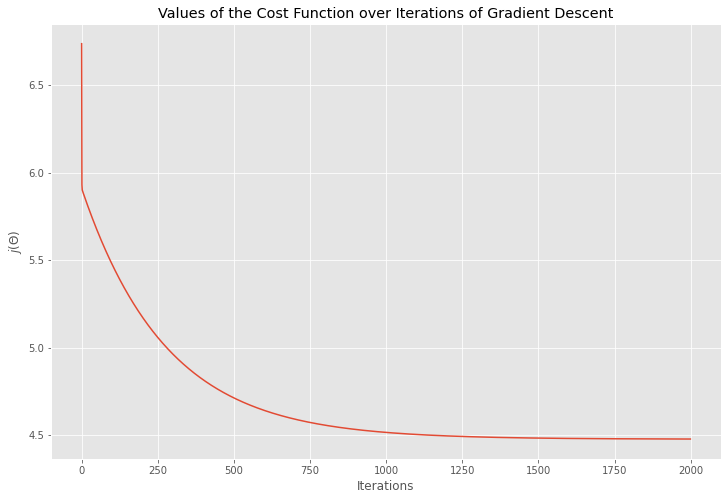

In [14]:
## Plotting the Convergence
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$j(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent");

In [15]:
## Training Data with Linear Regression Fit
theta.shape

(2, 1)

In [16]:
theta

array([[-3.78806857],
       [ 1.18221277]])

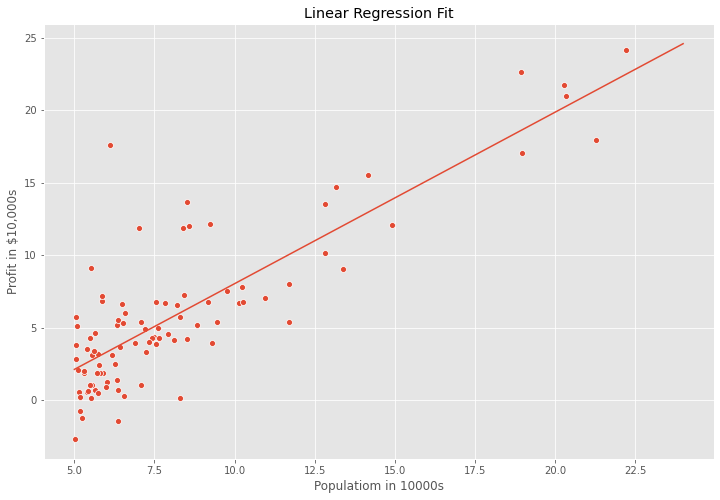

In [17]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=data)
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)
plt.xlabel("Populatiom in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

In [0]:
## Inference using the optimised theta value
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return y_pred

In [19]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000 people, the model predicts a profit of $9408.0


In [22]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $" + str(round(y_pred_2, 0)))

For a population of 83,000 people, the model predicts a profit of $60243.0
